In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

**Usefull functions**

In [2]:

def get_binary_category(e):
    if isinstance(e, int): return e
    return 1 if e=='yes' else 0

In [3]:
df_bank = pd.read_csv('bank/bank-full.csv', sep=';')

## Input variables:
#### bank client data:
1. age (numeric)
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric) 
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")
#### Related with the last contact of the current campaign:
9. contact: contact communication type (categorical: "unknown","telephone","cellular") 
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. duration: last contact duration, in seconds (numeric)
#### other attributes:
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

#### Output variable (desired target):
17. y - has the client subscribed a term deposit? (binary: "yes","no")



## Questions: 

### 1. Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?
**R:** Das pessoas que foram contatadas e possuem emprestimo, a maioria são `blue-collar, management` ou `technician`. Porém se olharmos a porcentagem de pessoas que fizeram emprestimo em cada profissão, temos que as profissões que mais possuem emprestimo são: `blue-collar, services` e ` admin`. O tipo de emprestimo mais comum é o  imobiliário (representado pela variável `housing`).

### 2. Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?
**R:**: Ao observamos o número de contatos (variável `campaign`) vemos a porcentagem de adesões cairem conforme o número de ligações vão aumentando, sendo que a maioria das vezes a campanha obtem sucesso entre a primeira e a terceira ligação. A partir da décima ligação,por exemplo, além de rara a ocorrencia, tem baixa taxa de adesão. 

### 3. Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?
**R:** Como podemos ver no dataframe acima, com no máximo 5 ligações já temos 95% das adesões. Então para otimizar, recomedaria em média, de 4 a 5 ligações e no máximo, 10 ligações, no qual obtemos 99% das adesões. 
        
### 4. O resultado da campanha anterior tem relevância na campanha atual?
**R:** Mais de 60% dos participantes que tiveram sucesso na pesquisa anterior, tiveram sucesso novamente nessa pesquisa. Isso considerando somente os que tiveram sucesso. Já os que tiveram o status como `failure` ou `other`, tiveram uma baixa taxa de sucesso, sendo 12% e 16% respectivamente. 
Sendo assim, a campanha tem uma boa taxa de aceitação quando teve sucesso na campanha anterior, porém baixa aceitação quando teve status de falha ou outros. 
Lemrbrando que a quantidade de pessoas que participaram da campanha anterior é pequena se comparado com a quantidade de pessoas que ainda não participaram de nenhuma campanha anterior. 

### 5. Qual o fator determinante para que o banco exija um seguro de crédito?
**R:**

### 6. Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?
**R:** Os clientes que possuem empréstimo imobiliário são, na maioria das vezes, casado, 2 grau completo, tem entre 25 e 50 anos. A profissão, aproveitando a resposta da pergunta 1, são geralmente `blue-collar`, `services` ou `admin`.

## Exploratory section

In [4]:
df = df_bank.copy()
df_bank.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# plot_correlation_map(df)

In [6]:


get_binary_category = np.vectorize(get_binary_category)
df['y'] = get_binary_category(df['y'])
df['housing'] = get_binary_category(df['housing'])
df['loan'] =  get_binary_category(df['loan'])

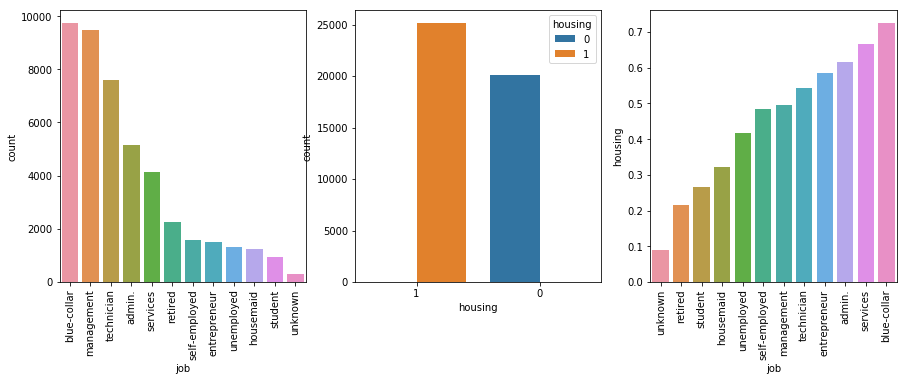

In [7]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
b = sns.countplot(x='job', data=df, ax=axis1, order = df['job'].value_counts().index)
_ = b.set_xticklabels(b.get_xticklabels(), rotation=90)
_ = sns.countplot(x='housing', hue="housing", data=df, order=[1,0], ax=axis2)

job_perc = df[["job", "housing"]].groupby(['job'],as_index=False).mean().sort_values('housing')
c = sns.barplot(x='job', y='housing', data=job_perc, ax=axis3)
_ = c.set_xticklabels(c.get_xticklabels(), rotation=90)


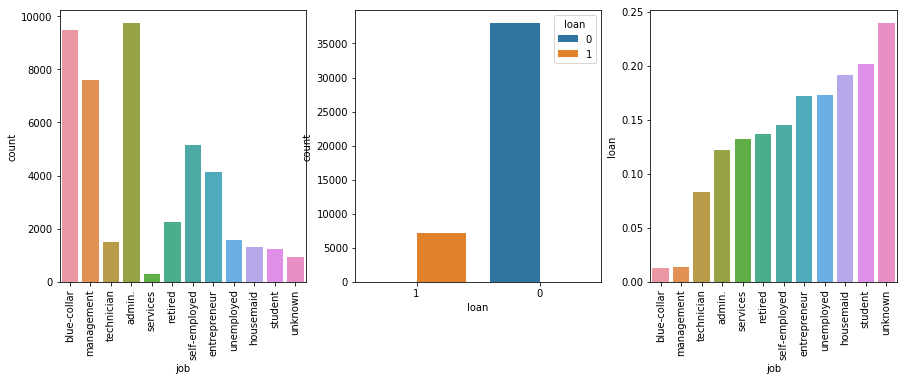

In [8]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
_ = sns.countplot(x='job', data=df, ax=axis1).set_xticklabels(b.get_xticklabels(), rotation=90)
_ = sns.countplot(x='loan', hue="loan", data=df, order=[1,0], ax=axis2)

job_perc = df[["job", "loan"]].groupby(['job'],as_index=False).mean().sort_values('loan')
_ = sns.barplot(x='job', y='loan', data=job_perc, ax=axis3).set_xticklabels(b.get_xticklabels(), rotation=90)

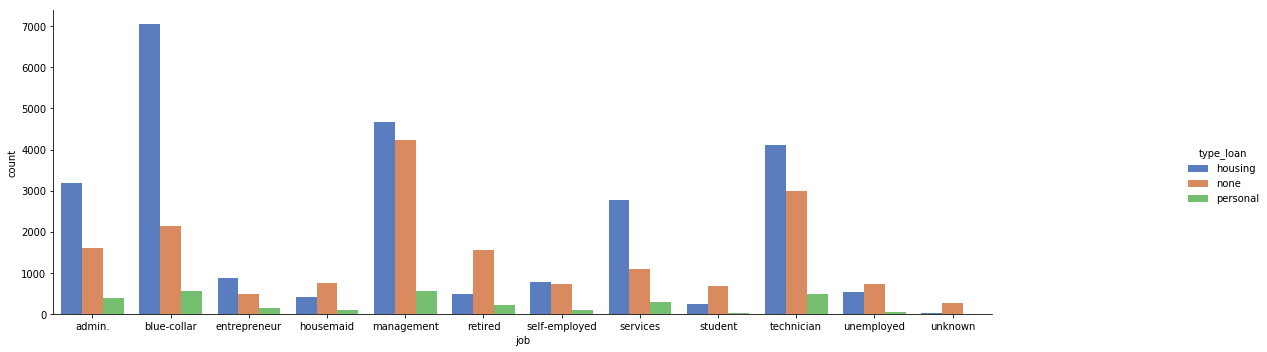

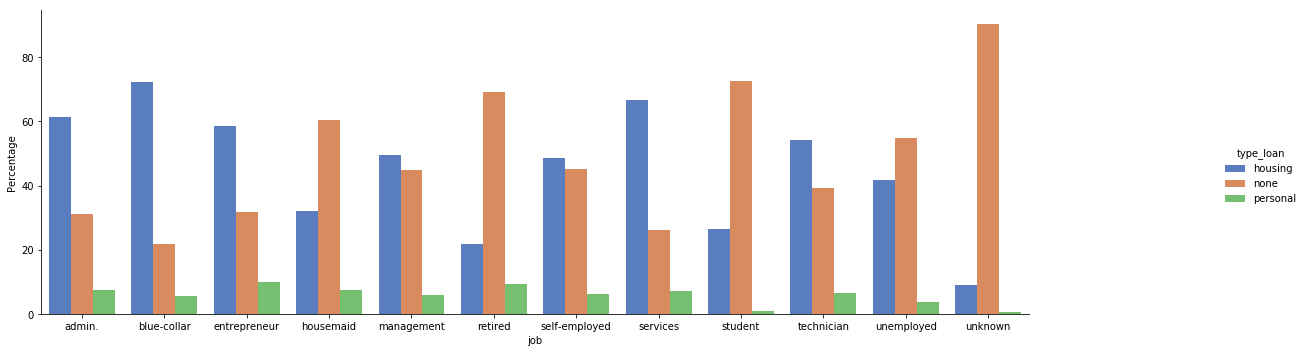

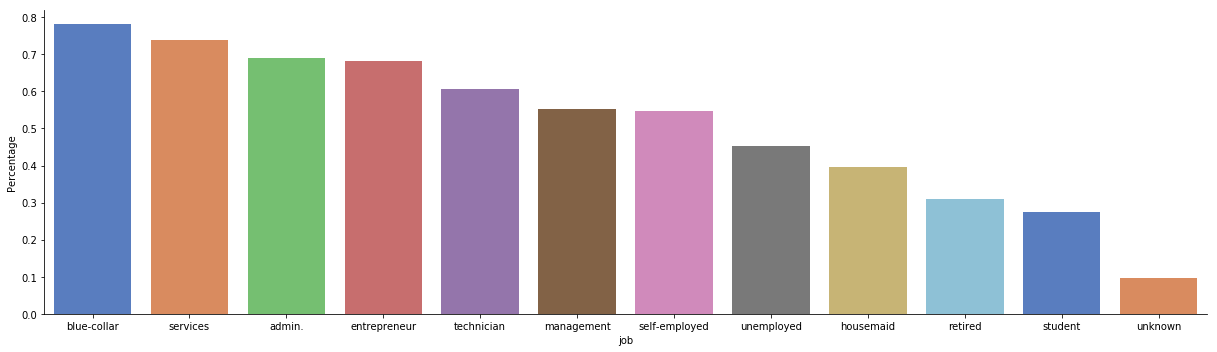

In [9]:
# df.loc[(df["loan"]==1) & (df["housing"]==1), 'type_loan'] = 'both'
df.loc[df["loan"]==1, 'type_loan'] = 'personal'
df.loc[df["housing"]==1, 'type_loan'] = 'housing'
df.loc[(df["loan"]==0) & (df["housing"]==0), 'type_loan'] = 'none'

df['teste'] = 1
df_tmp = df[['job', 'type_loan', 'teste']].groupby(['job', 'type_loan']).count().reset_index()

g = sns.catplot(x="job", y="teste", hue="type_loan", data=df_tmp, kind="bar", palette="muted")
g.fig.set_size_inches(20,5)

g.set_ylabels("count")

df['total'] = 1
df_count = df[['job', 'total']].groupby(['job']).count().reset_index()
df_tmp = df_tmp.merge(df_count, on=['job'], how='left')
df_tmp['teste'] = (df_tmp['teste']/df_tmp['total']) * 100

g = sns.catplot(x="job", y="teste", hue="type_loan", data=df_tmp, kind="bar", palette="muted")
_ = g.fig.set_size_inches(20,5)

_ = g.set_ylabels("Percentage")


df.loc[(df["loan"]==1) | (df["housing"]==1), 'has_loan'] = 1
df['has_loan'] = df['has_loan'].fillna(0)

df_tmp = df[['job', 'has_loan']].groupby(['job']).mean().reset_index()

g = sns.catplot(x="job", y="has_loan", data=df_tmp.sort_values('has_loan', ascending=False), kind="bar", palette="muted")
_ = g.fig.set_size_inches(20,5)

_ = g.set_ylabels("Percentage")

### 1. Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?
**R:** Das pessoas que foram contatadas e possuem emprestimo, a maioria são `blue-collar, management` ou `technician`. Porém se olharmos a porcentagem de pessoas que fizeram emprestimo em cada profissão, temos que as profissões que mais possuem emprestimo são: `blue-collar, services` e ` admin`. O tipo de emprestimo que mais fazem é o emprestimo imobiliário (representado pela variável `housing`).


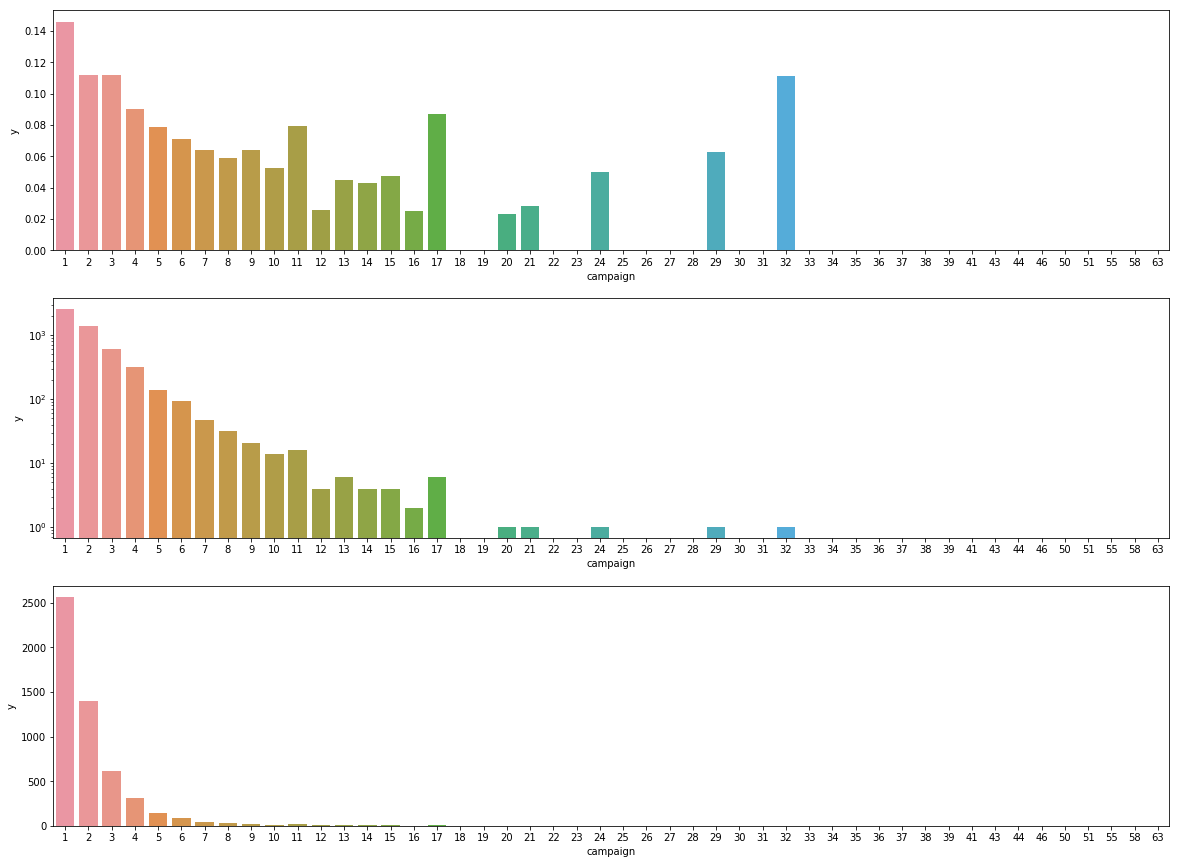

In [10]:
fig, [axis1, axis2, axis3] = plt.subplots(3,1,figsize=(20,15))
average_campaign = df[["campaign", "y"]].groupby(['campaign'],as_index=False).mean()
__ = sns.barplot(x='campaign', y='y', data=average_campaign, ax=axis1)

df_tmp = df[['y', 'campaign']].groupby(['campaign']).sum().reset_index()
__ = sns.barplot(x='campaign', y='y', data=df_tmp, ax=axis2)
__ = __.set(yscale="log")

__ = sns.barplot(x='campaign', y='y', data=df_tmp, ax=axis3)


In [11]:
qtd_sucesso = df['y'].sum()
total_sucess = [] 
qtd_lig = []
for i in range(1,11):
    qtd_lig.append(i)
    total_sucess.append(df[df['campaign'].isin(qtd_lig)]['y'].sum())
    
percentage = total_sucess / qtd_sucesso
# print(f'{total_sucess} / {qtd_sucesso} = {percentage:{0.4}}') 

pd.DataFrame({'campaign':range(1,11), 'cummulative_%':percentage})


,campaign,cummulative_%
0,1,0.484213
1,2,0.749102
2,3,0.865948
3,4,0.925884
4,5,0.952165
5,6,0.969559
6,7,0.978446
7,8,0.984496
8,9,0.988467
9,10,0.991114


### 2. Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?
**R:**: Ao observamos o número de contatos (variável `campaign`) vemos a porcentagem de adesões cairem conforme o número de ligações vão aumentando, sendo que a maioria das vezes a campanha obtem sucesso entre a primeira e a terceira ligação. A partir da décima ligação,por exemplo, além de rara a ocorrencia, tem baixa taxa de adesão. 

### 3. Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?
**R:** Como podemos ver no dataframe acima, com no máximo 5 ligações já temos 95% das adesões. Então para otimizar, recomedaria em média, de 4 a 5 ligações e no máximo, 10 ligações, no qual obtemos 99% das adesões. 

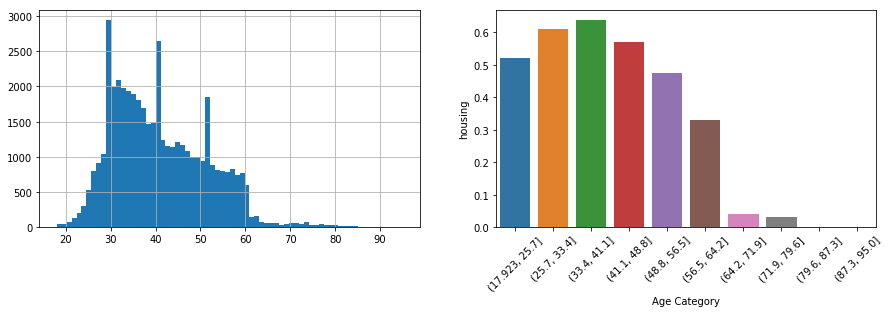

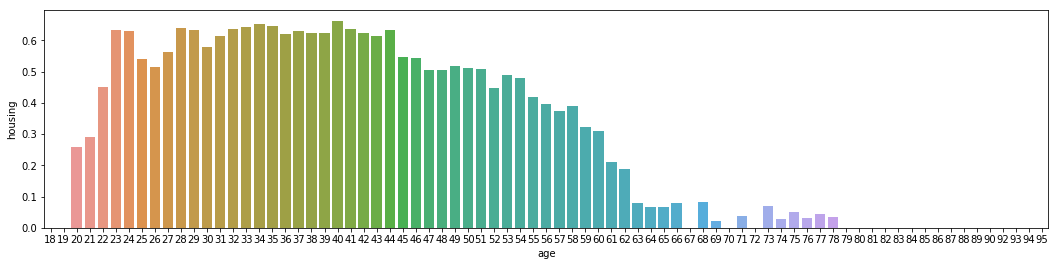

In [12]:
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(15,4))

std_age = df["age"].std()
average_age = df["age"].mean()
count_nan_age = df["age"].isnull().sum()

# Categorize Age - 10 years by category
df['Age Category'] = pd.cut(df['age'], 10)

# average y passengers by category
age_perc = df[["Age Category", "housing"]].groupby(['Age Category'], as_index=False).mean()
df['age'].astype(int).hist(bins=70, ax=axis1)

__ = sns.barplot(x='Age Category', y='housing', data=age_perc)
__ = __.set_xticklabels(age_perc['Age Category'].unique(), rotation=45)

# average y passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = df[["age", "housing"]].groupby(['age'],as_index=False).mean()
__ = sns.barplot(x='age', y='housing', data=average_age)

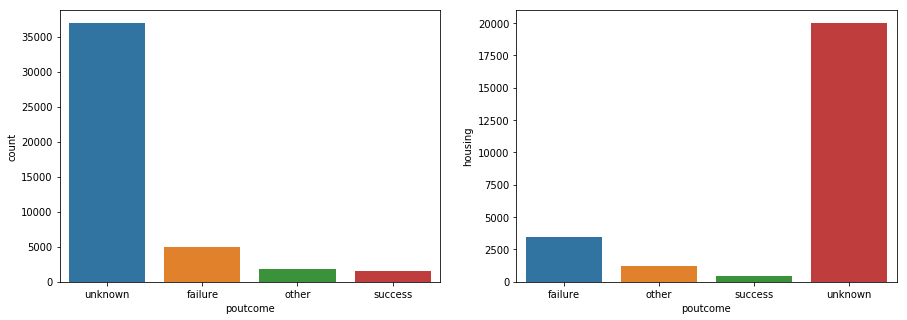

In [13]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))

_ = sns.countplot(x='poutcome', data=df, ax=axis1)

job_perc = df[df["housing"] == 1][["poutcome", "housing"]].groupby(['poutcome'],as_index=False).count()
_ = sns.barplot(x='poutcome', y='housing', data=job_perc, ax=axis2)


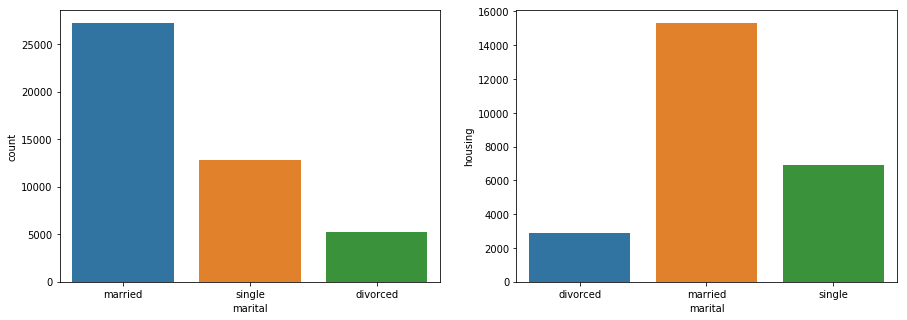

In [14]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))

_ = sns.countplot(x='marital', data=df, ax=axis1)

job_perc = df[df["housing"] == 1][["marital", "housing"]].groupby(['marital'],as_index=False).count()
_ = sns.barplot(x='marital', y='housing', data=job_perc, ax=axis2)


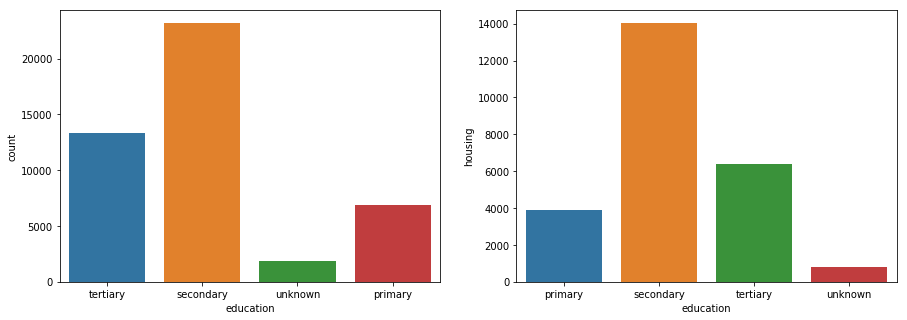

In [15]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))

_ = sns.countplot(x='education', data=df, ax=axis1)

job_perc = df[df["housing"] == 1][["education", "housing"]].groupby(['education'], as_index=False).count()
_ = sns.barplot(x='education', y='housing', data=job_perc, ax=axis2)


### 4. O resultado da campanha anterior tem relevância na campanha atual?
**R:** Mais de 60% dos participantes que tiveram sucesso na pesquisa anterior, tiveram sucesso novamente nessa pesquisa. Isso considerando somente os que tiveram sucesso. Já os que tiveram o status como `failure` ou `other`, tiveram uma baixa taxa de sucesso, sendo 12% e 16% respectivamente. 
Sendo assim, a campanha tem uma boa taxa de aceitação quando teve sucesso na campanha anterior, porém baixa aceitação quando teve status de falha ou outros. 
Lemrbrando que a quantidade de pessoas que participaram da campanha anterior é pequena se comparado com a quantidade de pessoas que ainda não participaram de nenhum campanha anterior. 

### 5. Qual o fator determinante para que o banco exija um seguro de crédito?
**R:**

### 6. Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?
**R:** Os clientes que possuem empréstimo imobiliário são, na maioria das vezes, casado, 2 grau completo, tem entre 25 e 50 anos. A profissão, aproveitando a resposta da pergunta 1, são geralmente `blue-collar`, `services` e `admin`.

In [16]:
total = len(df)
qtd_sucesso = df['y'].sum()
percentage = qtd_sucesso / total
print(f'{qtd_sucesso} / {total} = {percentage:{0.4}}') 

5289 / 45211 = 0.117


In [17]:
total = df['campaign'].sum()
qtd_sucesso = df['y'].sum()
percentage = qtd_sucesso / total
print(f'{qtd_sucesso} / {total} = {percentage:{0.4}}') 

5289 / 124956 = 0.04233
